<a href="https://colab.research.google.com/github/Aishuav01/CS746-PERSPECTIVES-ON-DATASCIENCE/blob/main/CS746_HW4_Auto_imports__Classification_Aishwarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

A situation that we encounter in our daily life is that, clasification of color shades. Oh my God, there exists a lot of colors!

Df2 dataset with no dummy variables is our input dataset.

In [343]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [344]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [345]:
#Read in data
df =pd.read_csv('gdrive/My Drive/auto_imports_cleaned_version2.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# 2. Preprocessing

In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [346]:
df['fuel_type']= df['fuel_type'].map({'gas': 0, 'diesel': 1})

In [347]:
df.fuel_type

0      0
1      0
2      0
3      0
4      0
      ..
196    0
197    0
198    0
199    1
200    0
Name: fuel_type, Length: 201, dtype: int64

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    int64  
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         201 non-null    float64
 8   stroke       201 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  201 non-null    float64
 11  peak_rpm     201 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 23.7 KB


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [348]:
X= df.drop(columns=["fuel_type"])
#Dependent variable price
y=df['fuel_type'].values.reshape(-1,1)
print(X)

     wheel_base  length  width  heights  curb_weight  engine_size  bore  \
0          88.6   168.8   64.1     48.8         2548          130  3.47   
1          88.6   168.8   64.1     48.8         2548          130  3.47   
2          94.5   171.2   65.5     52.4         2823          152  2.68   
3          99.8   176.6   66.2     54.3         2337          109  3.19   
4          99.4   176.6   66.4     54.3         2824          136  3.19   
..          ...     ...    ...      ...          ...          ...   ...   
196       109.1   188.8   68.9     55.5         2952          141  3.78   
197       109.1   188.8   68.8     55.5         3049          141  3.78   
198       109.1   188.8   68.9     55.5         3012          173  3.58   
199       109.1   188.8   68.9     55.5         3217          145  3.01   
200       109.1   188.8   68.9     55.5         3062          141  3.78   

     stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price  
0      2.68        

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

Splitting the data into train and test data with given parameter values.

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

In [350]:
X_train

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
26,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,7.6,102.0,5500.0,24,30,8558
148,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62.0,4800.0,31,38,6488
72,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175.0,5000.0,19,24,16503
164,98.4,176.2,65.6,52.0,2536,146,3.62,3.50,9.3,116.0,4800.0,24,30,9639
197,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,103.3,174.6,64.6,59.8,2535,122,3.35,3.46,8.5,88.0,5000.0,24,30,8921
21,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.4,68.0,5500.0,31,38,6377
96,97.2,173.4,65.2,54.7,2324,120,3.33,3.47,8.5,97.0,5200.0,27,34,8949
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [351]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [352]:
predicted_val = logisticRegr.predict(X_test)

In [353]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


[[55  0]
 [ 0  6]]


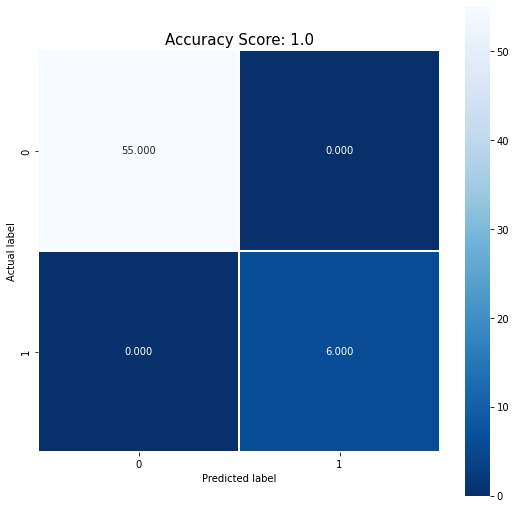

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_val)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [355]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         6

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [356]:
#use model to predict probability that given y value is 1
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

1.0


### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [357]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted_G= model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_G)
print(cm)

[[55  0]
 [ 0  6]]


In [359]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_G))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         6

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [360]:
#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predicted_G)

#print AUC score
print(auc)

1.0


### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [362]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Minimum error:- 0.04878048780487805 at K = 25


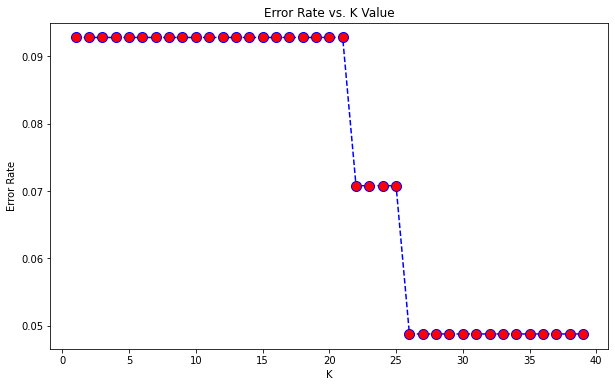

In [363]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimumm error rate found at k = 25, making it the optimal k

In [372]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [373]:
y_pred = classifier.predict(X_test)

In [374]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.50      0.67         2

    accuracy                           0.98        41
   macro avg       0.99      0.75      0.83        41
weighted avg       0.98      0.98      0.97        41



In [375]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)

#print AUC score
print(auc)

0.75


### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [376]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [377]:
predicted_SVM= clf.predict(X_test)

In [378]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted_SVM))
print(classification_report(y_test, predicted_SVM))

[[39  0]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00         2

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [381]:
#calculate AUC of model
auc = metrics.roc_auc_score(y_test, predicted_SVM)

#print AUC score
print(auc)

1.0


SVM classifier again resulted with 100% accuracy

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

We can  observe that logistic regression, Naives Bayes using GaussianNB and SVM classifier models performed well with 100% accuracy score. The data is rather split at a good interval. Whereas KNN did not perform very well with only 75% accuracy score.
Performance of KNN could have been affected as it relies on the distance computed and is reactive to the scale of data. For features with a higher scale, the calculated distances can be very high and might produce poor results.

## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

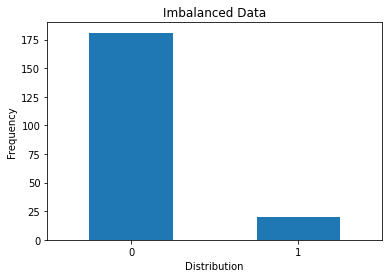

In [423]:
value_count = pd.value_counts(df['fuel_type'], sort=True)
value_count.plot(kind='bar',rot=0)
plt.ylabel('Frequency')
plt.xlabel('Distribution')
plt.title('Imbalanced Data')
plt.show()

In [424]:
from imblearn.over_sampling import SMOTE #import Oversampling Libraries
from collections import Counter
y=df['fuel_type']
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=45)
y = y.values.reshape(-1,1)
X_n, y_n = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_n))

Original dataset shape Counter({0: 181, 1: 20})
Resampled dataset shape Counter({0: 181, 1: 181})


In [425]:
#shape of new balanced data 
print(X_n.shape) 
print(y_n.shape)

(362, 14)
(362,)


In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_n, y_n, test_size=0.3, random_state=746)

In [428]:
#Train classifier on the optimal k that we chose from the plot
k = 25
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [429]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
auc = metrics.roc_auc_score(y_test, y_pred)
print(auc)

[[56  1]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        52

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

0.9912280701754386


We can observe that KNN which did not perform well with 75% accuracy score is performing rather well with 99.12% accuracy score using balanced data.